# Exercise 4 - Edges, Corners and Blobs
## Index No. : 190696U
## Name : Wijegunawardana C.H.W.

1. Show derivative of Gaussian filters as surface plots.

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

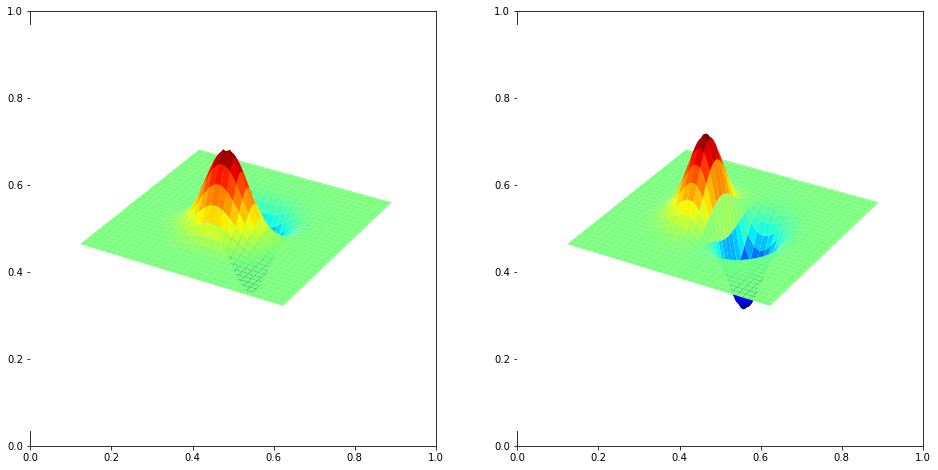

In [23]:
delta = 0.1
XX, YY = np.meshgrid(np.arange(-5,5 + delta, delta), np.arange(-5,5 + delta, delta))
sigma = 1

g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
g /= np.sum(g)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
g_x = cv.filter2D(g, -1, sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)
g_y = cv.filter2D(g, -1, sobel_h)

fig,ax = plt.subplots(1,2, figsize=(16,8))
ax1 = fig.add_subplot(121,projection='3d')
surf1 = ax1.plot_surface(XX,YY,g_x,cmap=cm.jet,linewidth=0,antialiased=True)

ax2 = fig.add_subplot(122,projection='3d')
surf2 = ax2.plot_surface(XX,YY,g_y,cmap=cm.jet,linewidth=0,antialiased=True)
ax1.axis('off')
ax2.axis('off')
plt.show()

2. Detect Harris corners using the OpenCV’s existing function. Use the image in Fig. 1.

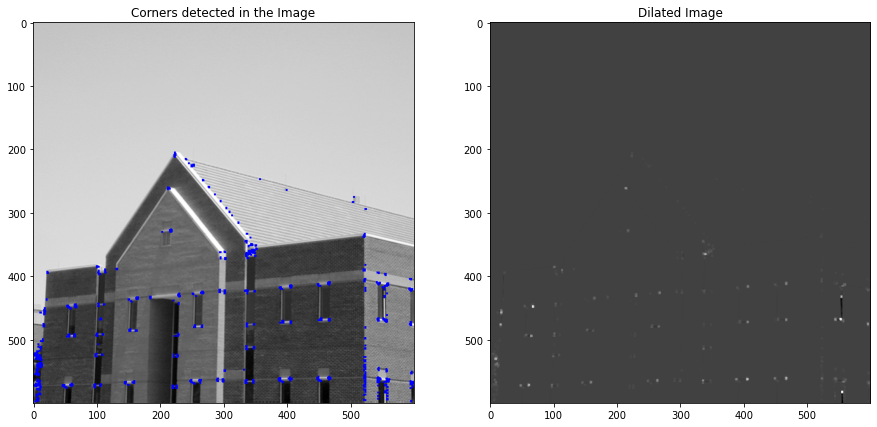

In [34]:
# Importing the image
img = cv.imread('building.tif', cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)

img[dst > 0.01*dst.max()] = [0,0,255]

fig,ax = plt.subplots(1,2,figsize = (15, 15))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title("Corners detected in the Image")
ax[1].imshow(dst, cmap = 'gray')
ax[1].set_title("Dilated Image")
plt.show()

3. Detect Harris corners using your own implementation. Use the same image.

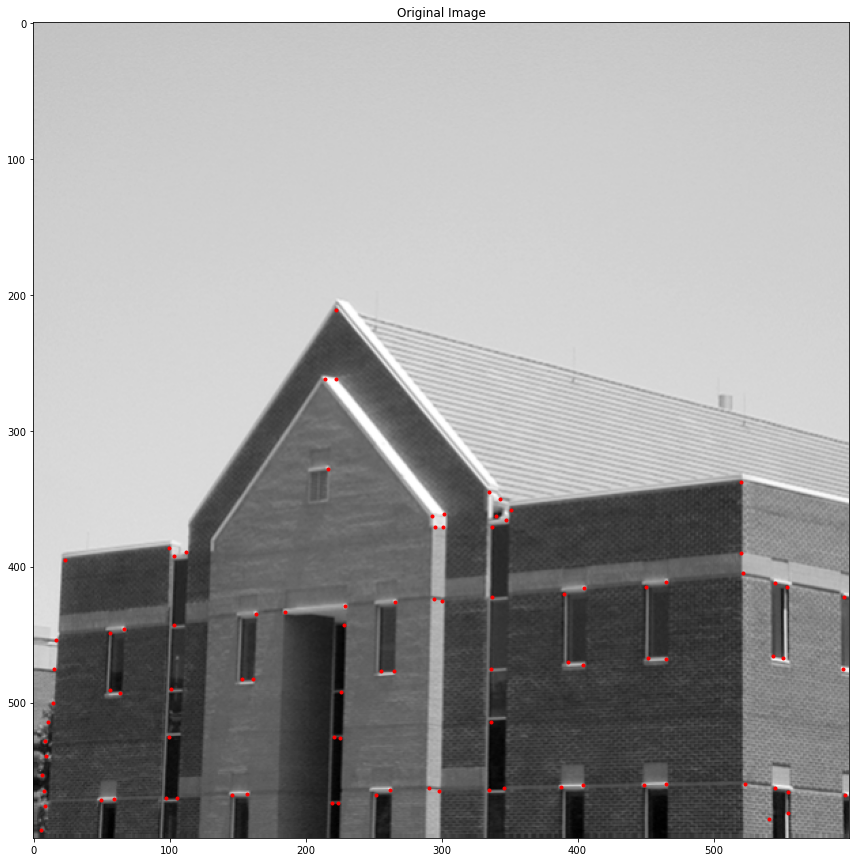

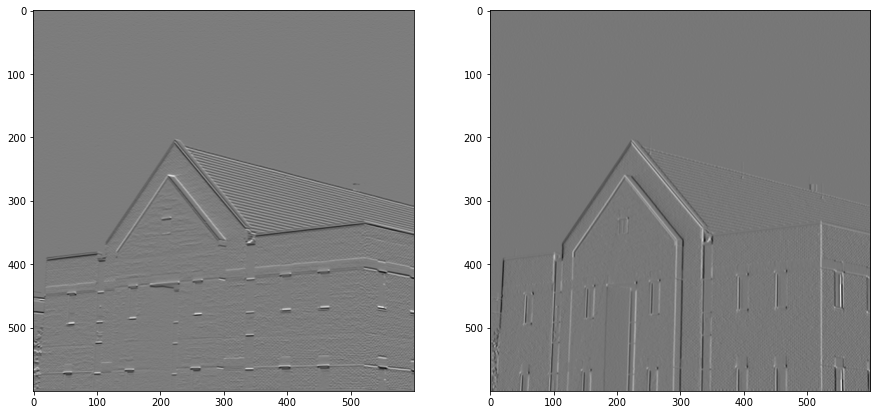

In [44]:
from skimage.feature import peak_local_max

# Importing the image
img = cv.imread('building.tif', cv.IMREAD_COLOR)
assert img is not None

I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = np.float32(gray)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)

sigma = 3
ksize = 7

I_x = cv.filter2D(I, -1, sobel_v)
I_y = cv.filter2D(I, -1, sobel_h)
m11 = cv.GaussianBlur(I_x*I_x, (ksize,ksize), sigma)
m12 = cv.GaussianBlur(I_x*I_y, (ksize,ksize), sigma)
m21 = cv.GaussianBlur(I_y*I_x, (ksize,ksize), sigma)
m22 = cv.GaussianBlur(I_y*I_y,(ksize,ksize), sigma)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace**2

R[R < 1e8] = 0
coordinates = peak_local_max(R, min_distance = 2)

fig,ax = plt.subplots(figsize = (15, 15))
ax.imshow(img, cmap = 'gray')
ax.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax.set_title("Original Image")
plt.show()

fig,ax = plt.subplots(1,2,figsize = (15, 15))
ax[0].imshow(I_x + 127, cmap = 'gray')
ax[1].imshow(I_y +127, cmap = 'gray')
plt.show()

4. Detect Canny edges using the OpenCV’s existing function.

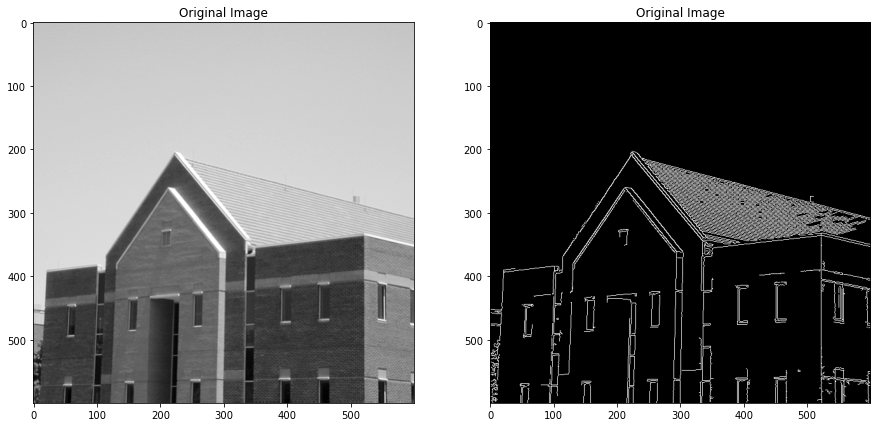

In [29]:
# Importing the image
img = cv.imread('building.tif', cv.IMREAD_GRAYSCALE)
assert img is not None

edges = cv.Canny(img, 100, 200)

fig,ax = plt.subplots(1,2,figsize = (15, 15))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].imshow(edges, cmap = 'gray')
ax[1].set_title("Canny filtered Image")
plt.show()

5. Match SIFT features between two images in the Graffiti sequence https://www.robots.ox.ac.uk/vg-g/data/affine/.